<h1 class='font-effect-3d' style='color:#37c9e1; font-family:Orbitron;'> &#x1F310; &nbsp; Code Library, Styling, and Links</h1>
`GITHUB` Version: &nbsp; &#x1F4D8; &nbsp; [kaggle_passnyc.ipynb](https://github.com/OlgaBelitskaya/kaggle_notebooks/blob/master/kaggle_passnyc.ipynb)

`R` Version: &nbsp; &#x1F4D8; &nbsp; [kaggle_passnyc_R.ipynb](https://github.com/OlgaBelitskaya/kaggle_notebooks/blob/master/kaggle_passnyc_R.ipynb)

Useful `LINKS`: 

&#x1F4E1; &nbsp; [School Quality Reports. Educator Guide](http://schools.nyc.gov/NR/rdonlyres/967E0EE1-7E5D-4E47-BC21-573FEEE23AE2/0/201516EducatorGuideHS9252017.pdf) & [New York City Department of Education](https://www.schools.nyc.gov)

&#x1F4E1; &nbsp; [NYC OpenData](https://opendata.cityofnewyork.us/)

&#x1F4E1; &nbsp; [Pandas Visualization](https://pandas.pydata.org/pandas-docs/stable/visualization.html) & [Pandas Styling](https://pandas.pydata.org/pandas-docs/stable/style.html)

In [1]:
library(IRdisplay); library(repr)
library(tidyverse); library(formattable)
library(zoo); library(grid); library(gridExtra)
cols<-c("#3636ff","#ff3636","#6f6fff","#ff6f6f")

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 2.2.1.9000     ✔ purrr   0.2.4     
✔ tibble  1.4.2          ✔ dplyr   0.7.4     
✔ tidyr   0.8.0          ✔ stringr 1.2.0     
✔ readr   1.2.0          ✔ forcats 0.2.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Attaching package: ‘gridExtra’

The following object is masked from ‘package:dplyr’:

    combine



In [2]:
display_html("<style> 
@import url('https://fonts.googleapis.com/css?family=Orbitron|Roboto&effect=3d');
body {background-color: gainsboro;} 
h4 {color:#818286; font-family:Roboto;}
span {color:black; text-shadow:4px 4px 4px #aaa;}
div.output_prompt,div.output_area pre {color:slategray;}
div.input_prompt,div.output_subarea {color:#37c9e1;}      
div.output_stderr pre {background-color:gainsboro;}  
div.output_stderr {background-color:slategrey;}
</style>")

<h1 class='font-effect-3d' style='color:#37c9e1; font-family:Orbitron;'>  &#x1F310; &nbsp; Data Loading<h1>

In [3]:
school_explorer<-read.csv("../input/2016 School Explorer.csv")
d5_shsat<-read.csv("../input/D5 SHSAT Registrations and Testers.csv")
school_explorer<-school_explorer[,4:161]
c(paste0('school_explorer =>',list(dim(school_explorer))),
  paste0('d5_shsat =>',list(dim(d5_shsat))))

[1] "school_explorer =>c(1272, 158)" "d5_shsat =>c(140, 7)"

In [4]:
t(formattable(school_explorer[1:3,1:8]))

,1,2,3
School.Name,P.S. 015 ROBERTO CLEMENTE,P.S. 019 ASHER LEVY,P.S. 020 ANNA SILVER
SED.Code,3.101e+11,3.101e+11,3.101e+11
Location.Code,01M015,01M019,01M020
District,1,1,1
Latitude,40.72183,40.72989,40.72127
Longitude,-73.97877,-73.98423,-73.98632
Address..Full.,"333 E 4TH ST NEW YORK, NY 10009","185 1ST AVE NEW YORK, NY 10003","166 ESSEX ST NEW YORK, NY 10002"
City,NEW YORK,NEW YORK,NEW YORK


In [5]:
cat(colnames(school_explorer)[1:38],sep=", ")

School.Name, SED.Code, Location.Code, District, Latitude, Longitude, Address..Full., City, Zip, Grades, Grade.Low, Grade.High, Community.School., Economic.Need.Index, School.Income.Estimate, Percent.ELL, Percent.Asian, Percent.Black, Percent.Hispanic, Percent.Black...Hispanic, Percent.White, Student.Attendance.Rate, Percent.of.Students.Chronically.Absent, Rigorous.Instruction.., Rigorous.Instruction.Rating, Collaborative.Teachers.., Collaborative.Teachers.Rating, Supportive.Environment.., Supportive.Environment.Rating, Effective.School.Leadership.., Effective.School.Leadership.Rating, Strong.Family.Community.Ties.., Strong.Family.Community.Ties.Rating, Trust.., Trust.Rating, Student.Achievement.Rating, Average.ELA.Proficiency, Average.Math.Proficiency

In [6]:
summary(school_explorer[,1:15])

                                                                         School.Name  
 P.S. 212                                                                      :   2  
 P.S. 253                                                                      :   2  
 A.C.E. ACADEMY FOR SCHOLARS AT THE GERALDINE FERRARO CAMPUS                   :   1  
 ACADEMIC LEADERSHIP CHARTER SCHOOL                                            :   1  
 ACADEMY FOR COLLEGE PREPARATION AND CAREER EXPLORATION: A COLLEGE BOARD SCHOOL:   1  
 ACADEMY FOR NEW AMERICANS                                                     :   1  
 (Other)                                                                       :1264  
    SED.Code         Location.Code     District        Latitude    
 Min.   :3.075e+11   01M015 :   1   Min.   : 1.00   Min.   :40.51  
 1st Qu.:3.209e+11   01M019 :   1   1st Qu.: 9.00   1st Qu.:40.67  
 Median :3.315e+11   01M020 :   1   Median :15.00   Median :40.72  
 Mean   :3.287e+11   01M034 :   

In [7]:
t(formattable(d5_shsat[1:5,]))

,1,2,3,4,5
DBN,05M046,05M046,05M046,05M046,05M123
School.name,P.S. 046 Arthur Tappan,P.S. 046 Arthur Tappan,P.S. 046 Arthur Tappan,P.S. 046 Arthur Tappan,P.S. 123 Mahalia Jackson
Year.of.SHST,2013,2014,2015,2016,2013
Grade.level,8,8,8,8,8
Enrollment.on.10.31,91,95,73,56,62
Number.of.students.who.registered.for.the.SHSAT,31,26,21,20,31
Number.of.students.who.took.the.SHSAT,14,7,10,8,14


In [8]:
summary(d5_shsat)

      DBN                                                       School.name
 05M362 : 8   Columbia Secondary School                               : 8  
 05M499 : 8   Democracy Prep Charter School                           : 8  
 05M670 : 8   Democracy Prep Harlem Charter School                    : 8  
 84M341 : 8   Frederick Douglass Academy                              : 8  
 84M350 : 8   Harlem Children's Zone Promise Academy II Charter School: 8  
 84M481 : 8   Thurgood Marshall Academy for Learning and Social Change: 8  
 (Other):92   (Other)                                                 :92  
  Year.of.SHST   Grade.level    Enrollment.on.10.31
 Min.   :2013   Min.   :8.000   Min.   : 17.00     
 1st Qu.:2014   1st Qu.:8.000   1st Qu.: 62.75     
 Median :2015   Median :8.000   Median : 86.00     
 Mean   :2015   Mean   :8.393   Mean   : 91.97     
 3rd Qu.:2016   3rd Qu.:9.000   3rd Qu.:113.00     
 Max.   :2016   Max.   :9.000   Max.   :344.00     
                            

<h1 class='font-effect-3d' style='color:#37c9e1; font-family:Orbitron;'> &#x1F310; &nbsp; Missing Values </h1>

In [9]:
school_explorer[school_explorer=="N/A"]<-NA
na_counts<-colSums(is.na(school_explorer))[colSums(is.na(school_explorer))!=0]
na_counts<-data.frame(na_counts)
colnames(na_counts)<-c("NA Counting")
formattable(na_counts)

,NA Counting
Economic.Need.Index,25
School.Income.Estimate,396
Student.Attendance.Rate,25
Percent.of.Students.Chronically.Absent,25
Rigorous.Instruction..,25
Rigorous.Instruction.Rating,76
Collaborative.Teachers..,25
Collaborative.Teachers.Rating,76
Supportive.Environment..,25
Supportive.Environment.Rating,80


In [10]:
sum((is.na(d5_shsat)))

[1] 0

<h1 class='font-effect-3d' style='color:#37c9e1; font-family:Orbitron;'> &#x1F310; &nbsp; School Names </h1>

In [11]:
head(formattable(summary(school_explorer$School.Name)))

P.S. 212 
                                                                             2 
                                                                      P.S. 253 
                                                                             2 
                   A.C.E. ACADEMY FOR SCHOLARS AT THE GERALDINE FERRARO CAMPUS 
                                                                             1 
                                            ACADEMIC LEADERSHIP CHARTER SCHOOL 
                                                                             1 
ACADEMY FOR COLLEGE PREPARATION AND CAREER EXPLORATION: A COLLEGE BOARD SCHOOL 
                                                                             1 
                                                     ACADEMY FOR NEW AMERICANS 
                                                                             1

In [12]:
n1<-school_explorer$School.Name=='P.S. 212'
n2<-school_explorer$School.Name=='P.S. 253'
names<-(n1|n2)
t(formattable(school_explorer[which(names),1:10]))

,428,713,909,1024
School.Name,P.S. 212,P.S. 253,P.S. 253,P.S. 212
SED.Code,3.212e+11,3.321e+11,3.427e+11,3.430e+11
Location.Code,12X212,21K253,27Q253,30Q212
District,12,21,27,30
Latitude,40.82872,40.58008,40.60730,40.75319
Longitude,-73.90045,-73.96195,-73.74881,-73.88490
Address..Full.,"1180 TINTON AVE BRONX, NY 10456","601 OCEANVIEW AVE BROOKLYN, NY 11235","1307 CENTRAL AVE FAR ROCKAWAY, NY 11691","34-25 82ND ST JACKSON HEIGHTS, NY 11372"
City,BRONX,BROOKLYN,FAR ROCKAWAY,JACKSON HEIGHTS
Zip,10456,11235,11691,11372
Grades,"PK,0K,01,02,03,04,05,06,07,08","PK,0K,01,02,03,04,05","PK,0K,01,02,03,04,05","0K,01,02,03,04,05"


In [13]:
school_explorer$School.Name <- as.character(school_explorer$School.Name)
school_explorer$School.Name[428]<-'P.S. 212 D12'
school_explorer$School.Name[1024]<-'P.S. 212 D30'
school_explorer$School.Name[713]<-'P.S. 253 D21'
school_explorer$School.Name[909]<-'P.S. 253 D27'
t(formattable(school_explorer[c(428,713,909,1024),1:10]))

,428,713,909,1024
School.Name,P.S. 212 D12,P.S. 253 D21,P.S. 253 D27,P.S. 212 D30
SED.Code,3.212e+11,3.321e+11,3.427e+11,3.430e+11
Location.Code,12X212,21K253,27Q253,30Q212
District,12,21,27,30
Latitude,40.82872,40.58008,40.60730,40.75319
Longitude,-73.90045,-73.96195,-73.74881,-73.88490
Address..Full.,"1180 TINTON AVE BRONX, NY 10456","601 OCEANVIEW AVE BROOKLYN, NY 11235","1307 CENTRAL AVE FAR ROCKAWAY, NY 11691","34-25 82ND ST JACKSON HEIGHTS, NY 11372"
City,BRONX,BROOKLYN,FAR ROCKAWAY,JACKSON HEIGHTS
Zip,10456,11235,11691,11372
Grades,"PK,0K,01,02,03,04,05,06,07,08","PK,0K,01,02,03,04,05","PK,0K,01,02,03,04,05","0K,01,02,03,04,05"


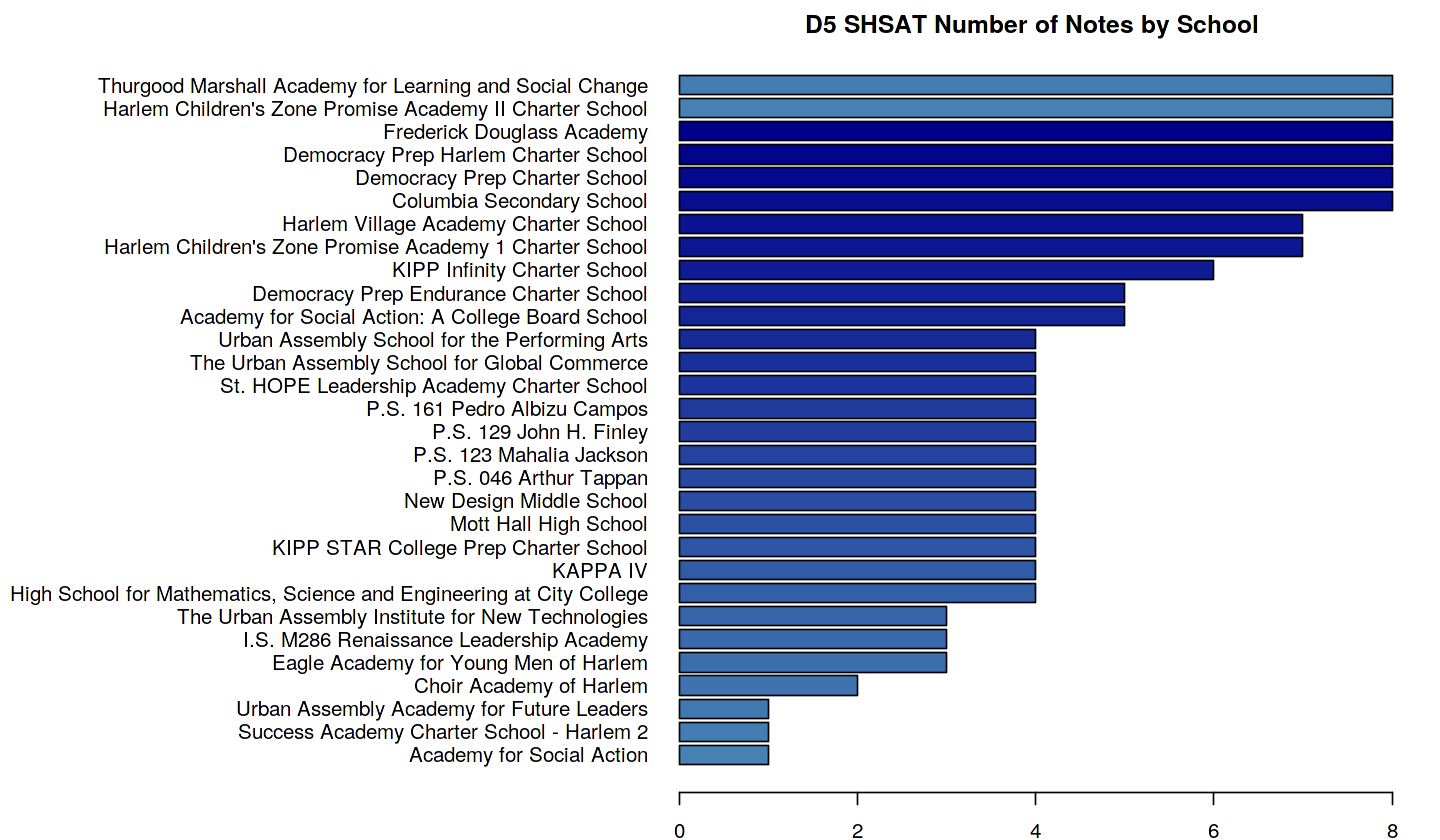

In [14]:
options(repr.plot.width=12,repr.plot.height=7)
par(mar=c(2,28,2,2))
counts<-table(d5_shsat$School.name)
pal<-colorRampPalette(colors=c("steelblue","darkblue"))(28)
barplot(sort(counts),horiz=TRUE,col=pal,ylab="",las=1,
        main="D5 SHSAT Number of Notes by School")

<h1 class='font-effect-3d' style='color:#37c9e1; font-family:Orbitron;'> &#x1F310; &nbsp; Preprocessing </h1>

In [15]:
school_explorer$School.Income.Estimate<- 
as.character(school_explorer$School.Income.Estimate)
school_explorer$School.Income.Estimate<- 
sub("\\$","",school_explorer$School.Income.Estimate)
school_explorer$School.Income.Estimate<- 
sub(",","",school_explorer$School.Income.Estimate)
school_explorer$School.Income.Estimate<- 
as.numeric(school_explorer$School.Income.Estimate)
school_explorer$School.Income.Estimate<- 
na.approx(school_explorer$School.Income.Estimate)

In [16]:
nastr2num<-function(x){x<-as.numeric(sub("%","",x))}
percent_list<-c('Percent.ELL',
                'Percent.Asian','Percent.Black','Percent.Hispanic',
                'Percent.Black...Hispanic','Percent.White',
                'Student.Attendance.Rate',
                'Percent.of.Students.Chronically.Absent',
                'Rigorous.Instruction..','Collaborative.Teachers..',
                'Supportive.Environment..','Effective.School.Leadership..',
                'Strong.Family.Community.Ties..','Trust..')
target_list<-c("Average.ELA.Proficiency","Average.Math.Proficiency")
economic_list<-c("Economic.Need.Index","School.Income.Estimate")
rating_list<-c('Rigorous.Instruction.Rating','Collaborative.Teachers.Rating',
               'Supportive.Environment.Rating','Effective.School.Leadership.Rating',
               'Strong.Family.Community.Ties.Rating','Trust.Rating',
               'Student.Achievement.Rating')

In [17]:
for (el in c(percent_list,target_list,"Economic.Need.Index")) {
    school_explorer[el]<-sapply(school_explorer[el],nastr2num)
    school_explorer[el]<-na.approx(school_explorer[el])}
for (el in rating_list) {
    vtable<-data.frame(table(school_explorer[el]))
    mvalue<-as.character(vtable$Var1[vtable$Freq==max(vtable$Freq)])
    school_explorer[el][is.na(school_explorer[el])]<-mvalue}

In [18]:
sum(is.na(school_explorer))

[1] 0

<h1 class='font-effect-3d' style='color:#37c9e1; font-family:Orbitron;'>  &#x1F310; &nbsp; Indicators' Visualisation </h1>
Let's try to find the best way of representing each variable.
#### Distribution Plots

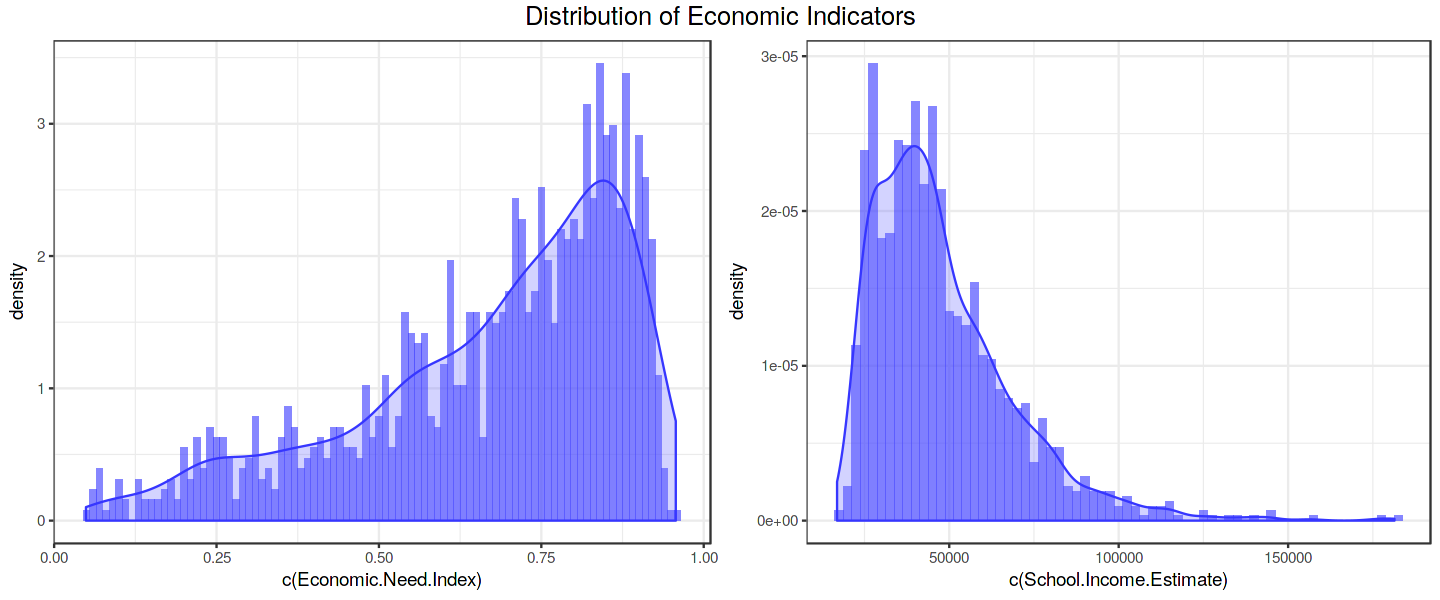

In [19]:
options(repr.plot.width=12,repr.plot.height=5)
p1<-ggplot(school_explorer,aes(x=c(Economic.Need.Index)))+ 
      geom_histogram(aes(y=..density..),binwidth=.01,
                     alpha=.6,fill=cols[1])+
      geom_density(alpha=.3,fill=cols[3],color=cols[1])+
      theme_bw()
p2<-ggplot(school_explorer,aes(x=c(School.Income.Estimate)))+ 
      geom_histogram(aes(y=..density..),binwidth=2500,
                     alpha=.6,fill=cols[1])+
      geom_density(alpha=.3,fill=cols[3],color=cols[1])+
      theme_bw()
top<-textGrob("Distribution of Economic Indicators",
              gp=gpar(fontsize=15))
grid.arrange(p1,p2,ncol=2,top=top)

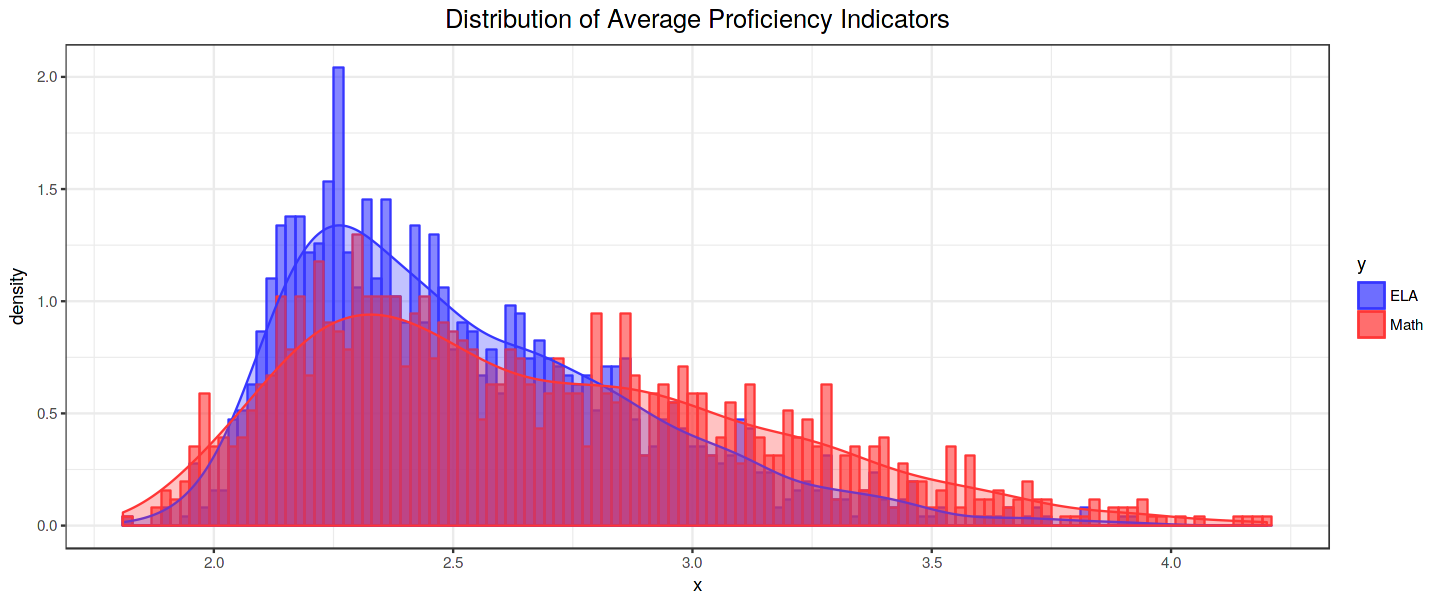

In [20]:
data<-data.frame(x=c(school_explorer$Average.ELA.Proficiency,
                     school_explorer$Average.Math.Proficiency),
                 y=rep(c('ELA','Math'),each=1272))
ggplot(data,aes(x=x,fill=y,color=y))+ 
    geom_histogram(aes(y=..density..),alpha=.6,
                   binwidth=.02,position="identity")+
    geom_density(alpha=.3)+ 
    theme_bw()+
    scale_fill_manual(values=cols[1:2])+ 
    scale_color_manual(values=cols[1:2])+
    ggtitle("Distribution of Average Proficiency Indicators")+
    theme(plot.title=element_text(size=15,hjust=.5))

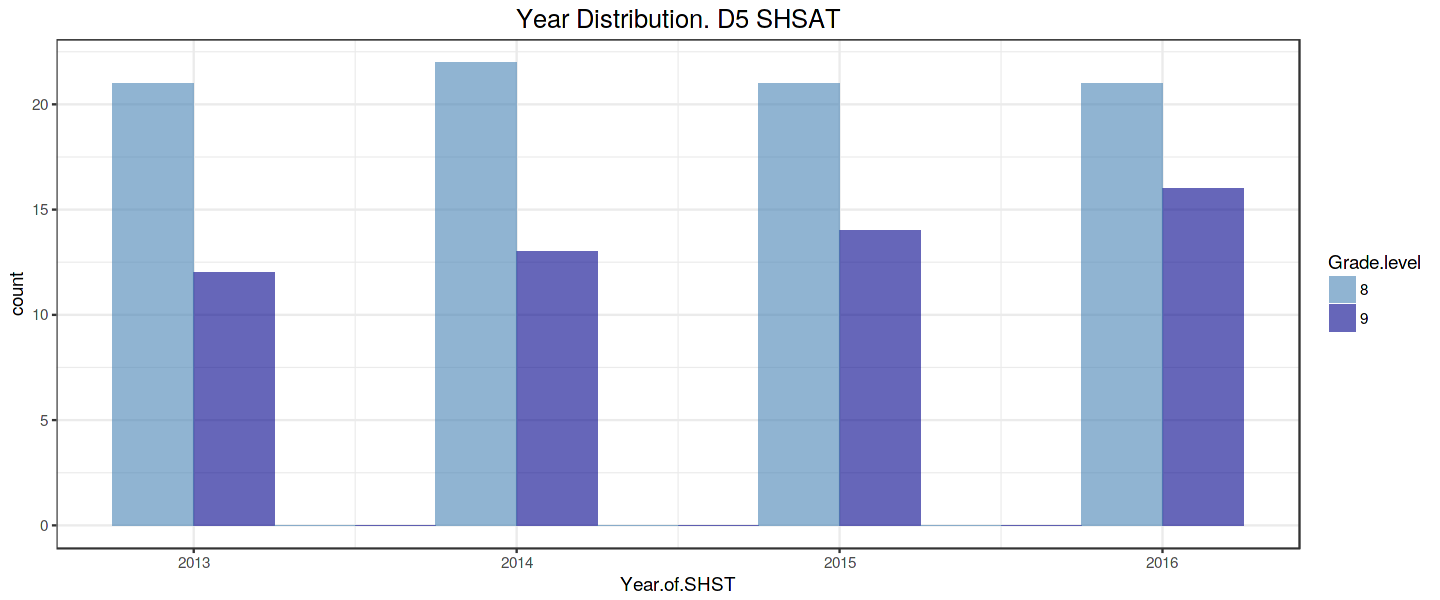

In [21]:
d5_shsat$Grade.level<-as.character(d5_shsat$Grade.level)
ggplot(d5_shsat,aes(x=Year.of.SHST,fill=Grade.level))+
    geom_histogram(binwidth=.5,alpha=.6,
                   position="dodge")+
    theme_bw()+
    scale_fill_manual(values=c("steelblue","darkblue"))+
    ggtitle("Year Distribution. D5 SHSAT")+
    theme(plot.title=element_text(size=15,hjust=.5))

#### Area Plots

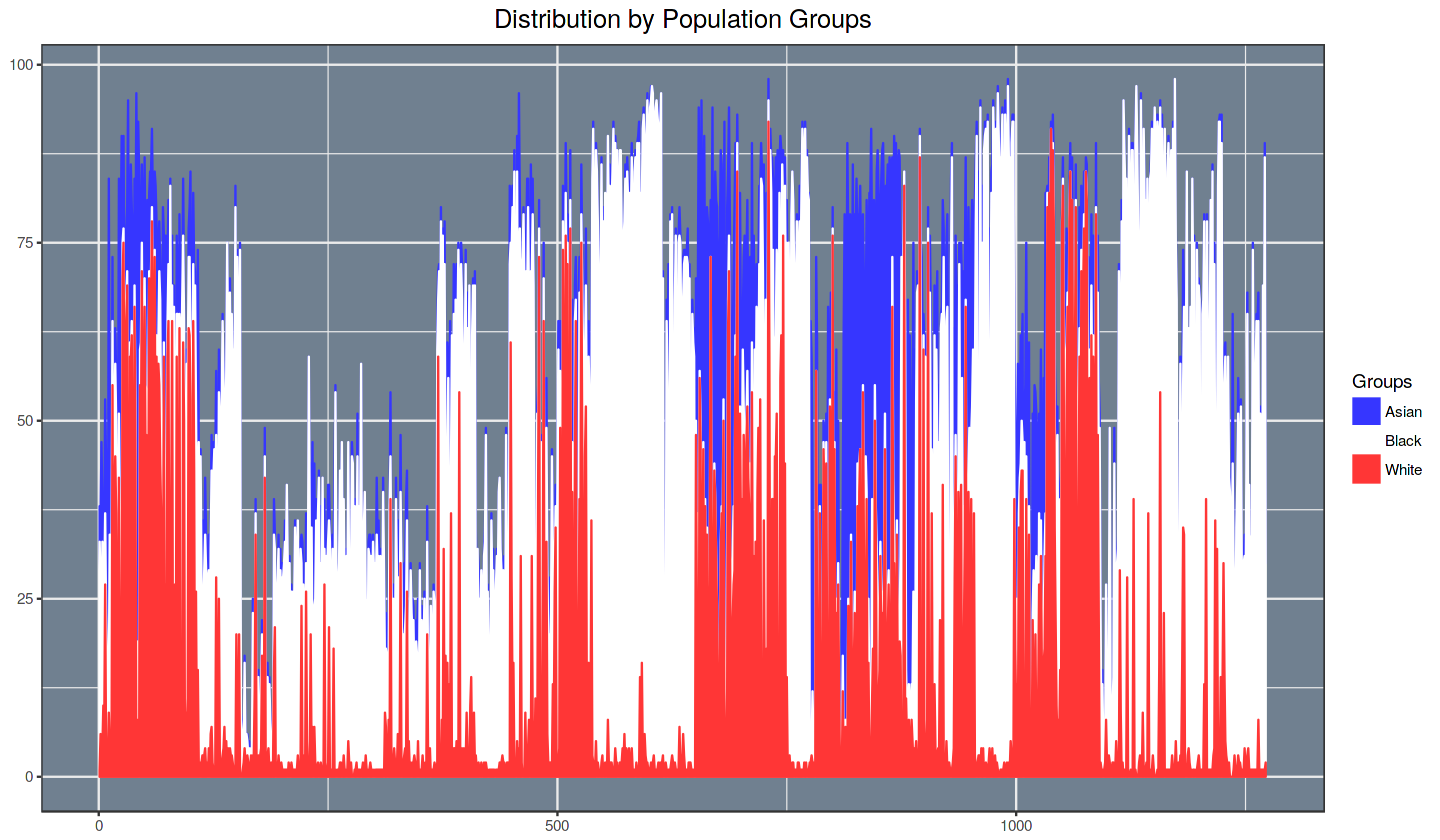

In [22]:
options(repr.plot.width=12,repr.plot.height=7)
data <- data.frame(x=rep(c(1:1272),3),
                   y=c(school_explorer$Percent.Asian,
                       school_explorer$Percent.White,
                       school_explorer$Percent.Black),
                   Groups=rep(c('Asian','White','Black'),each=1272))
ggplot(data,aes(x=x,y=y,fill=Groups,color=Groups),xlab="")+
    geom_area()+theme_bw()+
    scale_fill_manual(values=c(cols[1],'white',cols[2]))+
    scale_color_manual(values=c(cols[1],'white',cols[2]))+
    ggtitle("Distribution by Population Groups")+
    theme(plot.title=element_text(size=15,hjust=.5),
          axis.title=element_blank(),
          panel.background=element_rect(fill='slategray'))

#### Scatter Plots

In [23]:
options(repr.plot.width=12,repr.plot.height=11)
plot_variable1<-function(v,x,lc,hc) {
    ggplot(school_explorer,aes(x=Longitude,y=Latitude,
                               color=c(school_explorer[v][1:1272,])))+
    geom_point(size=.8)+
    theme_bw()+ggtitle(gsub("\\."," ",v))+
    scale_colour_gradient2(low=lc,high=hc,mid='white',midpoint=x)+
    guides(color=guide_colourbar(title=''))+
    theme(plot.title=element_text(size=15,hjust=.5),
          panel.background=element_rect(fill='slategray'))}

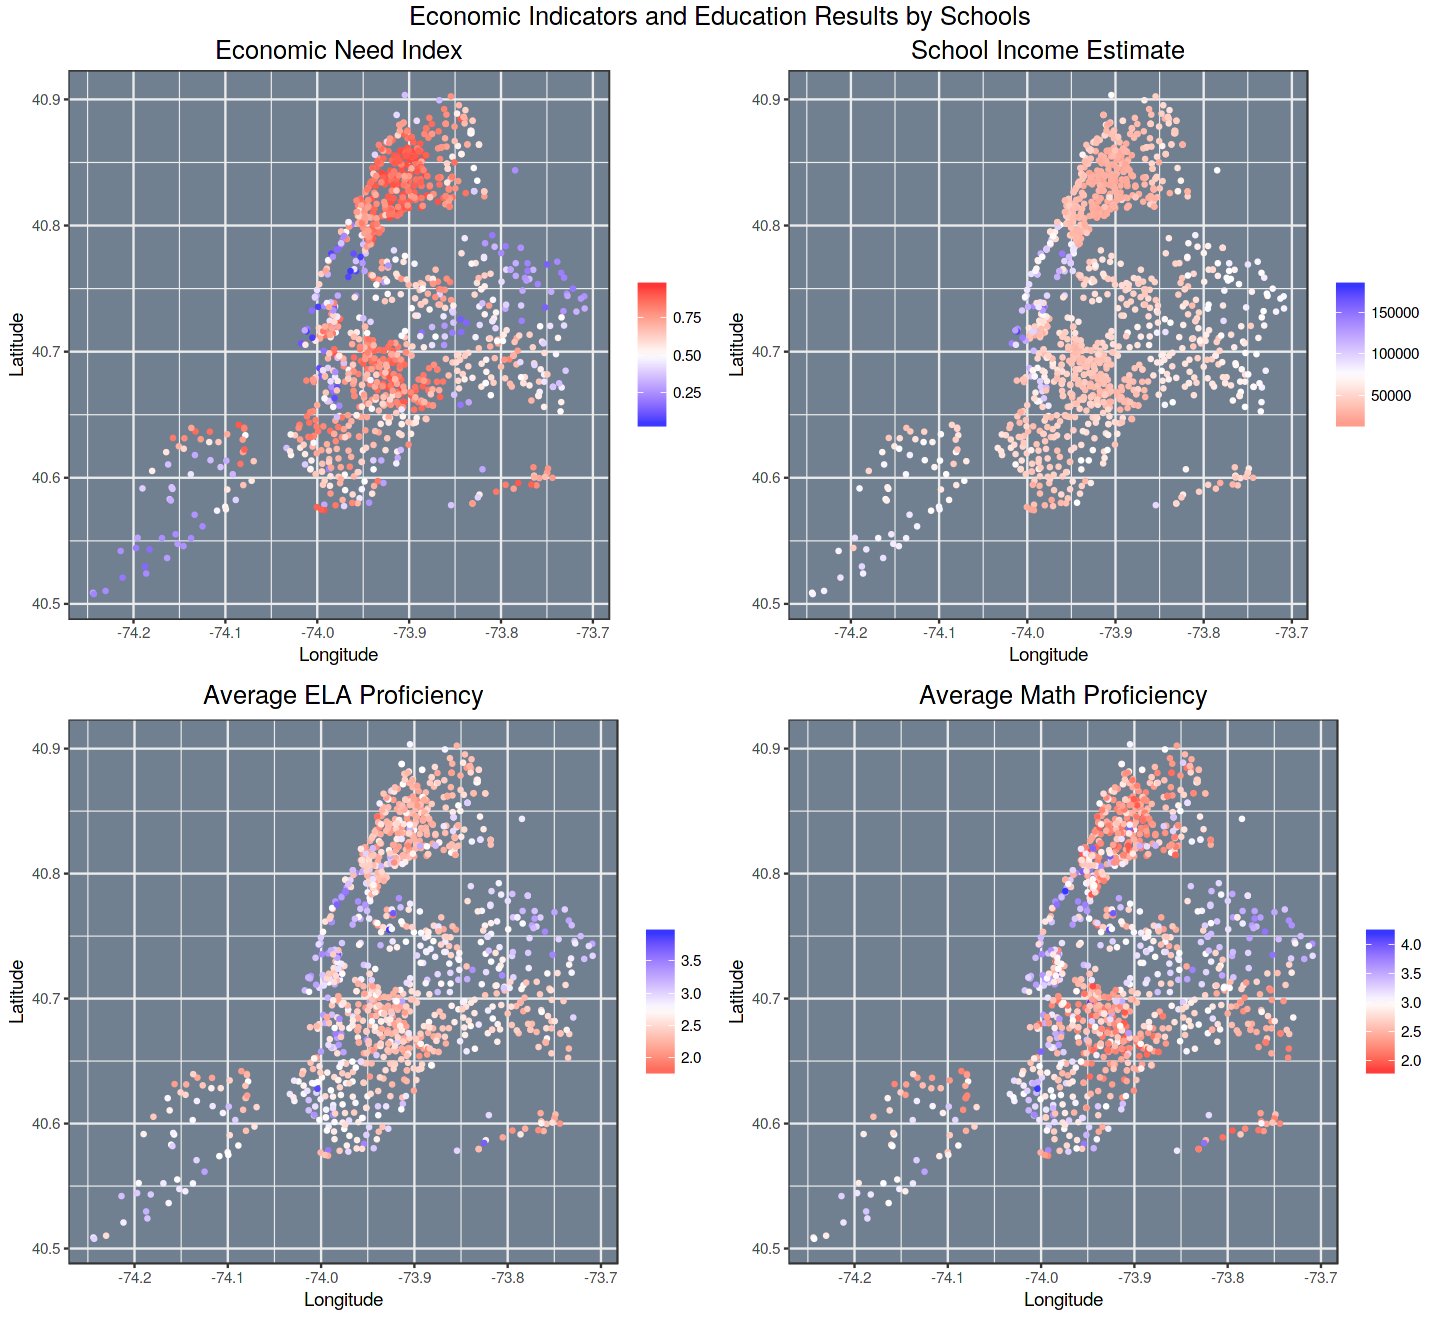

In [24]:
p1<-plot_variable1('Economic.Need.Index',.5,cols[1],cols[2])
p2<-plot_variable1('School.Income.Estimate',75000,cols[2],cols[1])
p3<-plot_variable1('Average.ELA.Proficiency',2.75,cols[2],cols[1])
p4<-plot_variable1('Average.Math.Proficiency',3.0,cols[2],cols[1])
top<-textGrob("Economic Indicators and Education Results by Schools",
              gp=gpar(fontsize=15))
grid.arrange(p1,p2,p3,p4,ncol=2,nrow=2,top=top)

Fortunately, economic problems are not correlated with educational results so strongly.

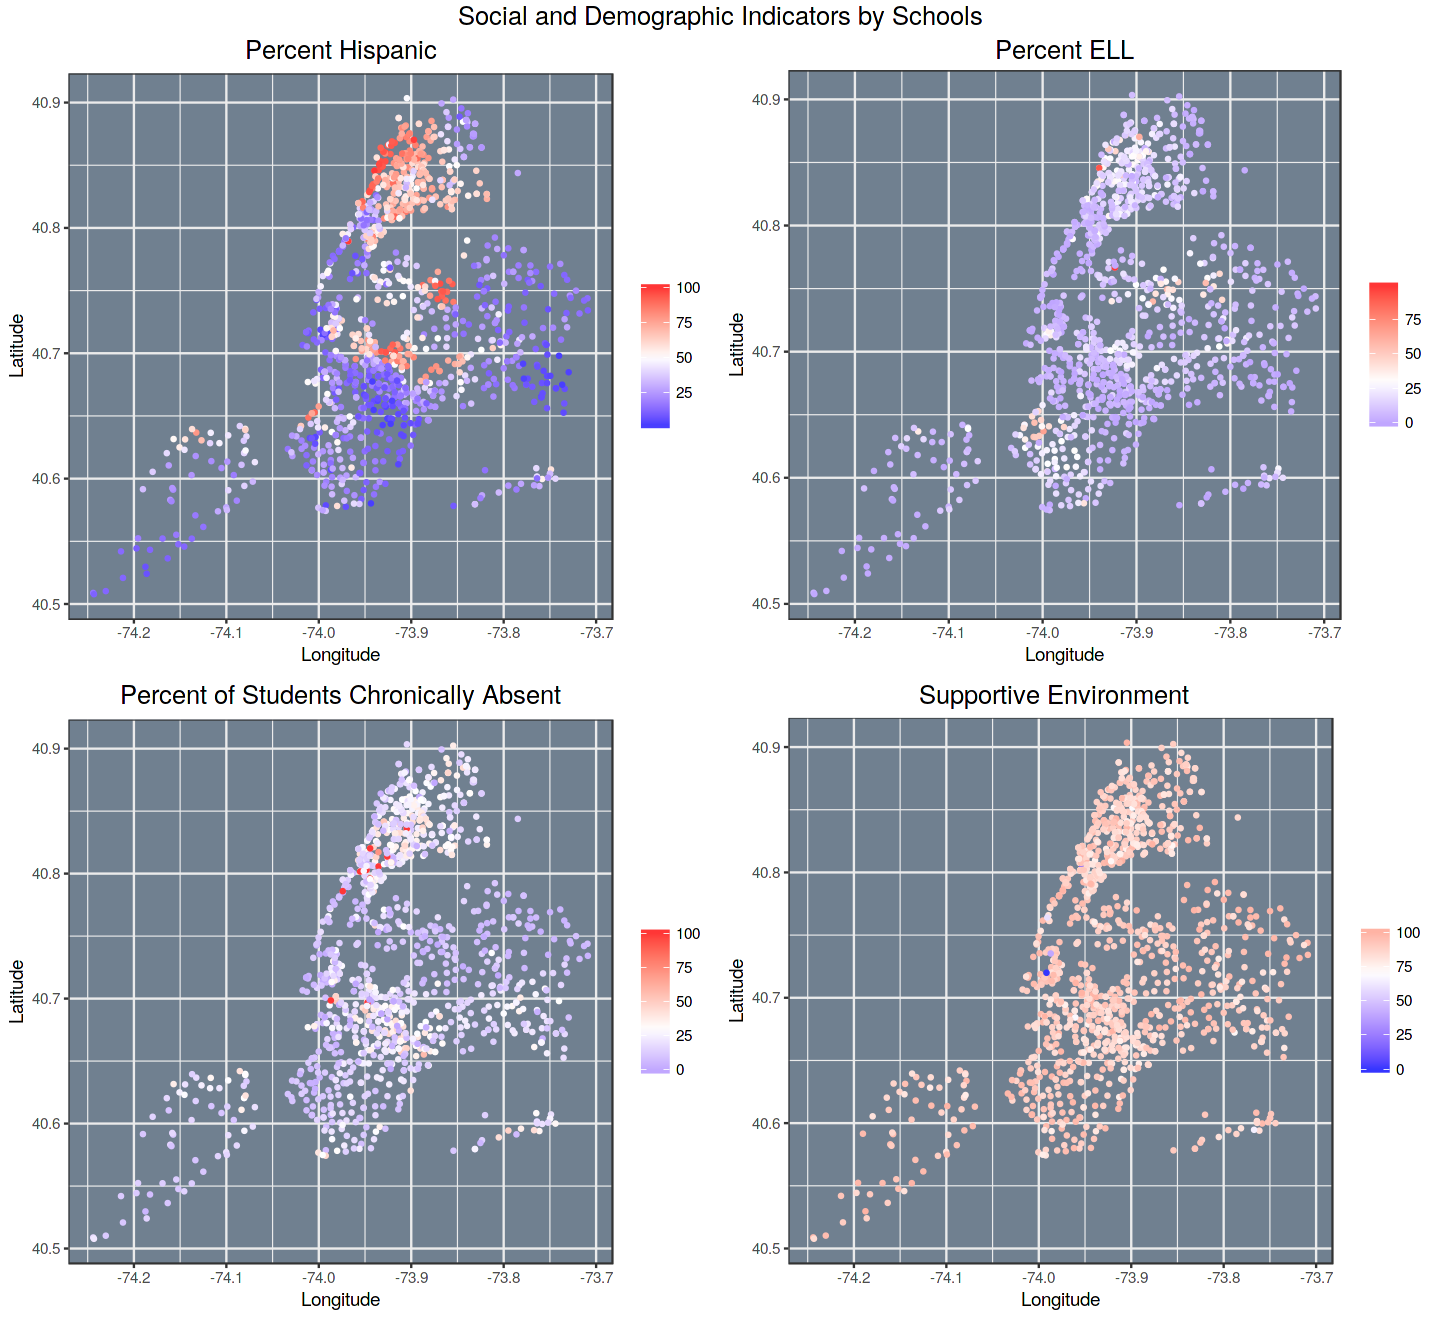

In [25]:
p1<-plot_variable1('Percent.Hispanic',50,cols[1],cols[2])
p2<-plot_variable1('Percent.ELL',30,cols[1],cols[2])
p3<-plot_variable1('Percent.of.Students.Chronically.Absent',
                   30,cols[1],cols[2])
p4<-plot_variable1('Supportive.Environment..',
                   70,cols[1],cols[2])
top<-textGrob("Social and Demographic Indicators by Schools",
              gp=gpar(fontsize=15))
grid.arrange(p1,p2,p3,p4,ncol=2,nrow=2,top=top)

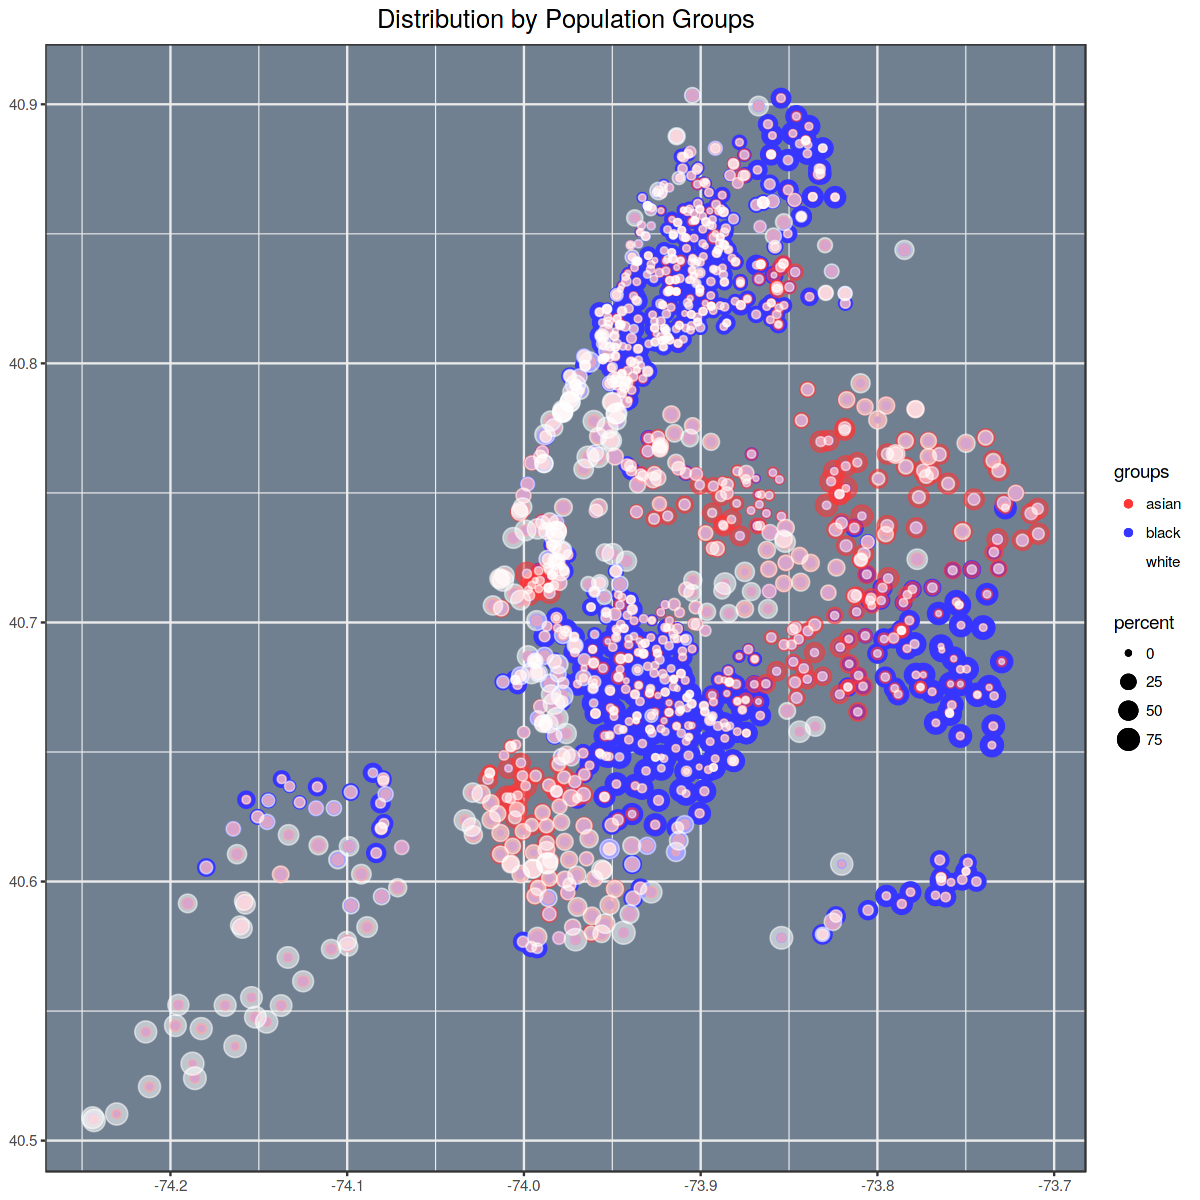

In [26]:
options(repr.plot.width=10,repr.plot.height=10)
data<-data.frame(x=c(school_explorer$Longitude),
                 y=c(school_explorer$Latitude),
                 asian=c(school_explorer$Percent.Asian),
                 white=c(school_explorer$Percent.White),
                 black=c(school_explorer$Percent.Black))
vc=c(asian=cols[2],white="white",black=cols[1])
ggplot(data,aes(x=x,y=y,color=variable))+ 
    geom_point(aes(size=black,col="black"))+ 
    geom_point(aes(size=asian,col="asian",alpha=.4))+
    geom_point(aes(size=white,col="white",alpha=.4))+
    scale_colour_manual(name='groups',values=vc)+
    theme_bw()+ 
    guides(size=guide_legend(title="percent"),alpha="none")+ 
    ggtitle("Distribution by Population Groups")+
    theme(plot.title=element_text(size=15,hjust=.5),
          axis.title=element_blank(),
          panel.background=element_rect(fill='slategray'))

As it was expected there are some correlation tendencies between economic problems and social environment, discipline, ethnic characteristics.

#### Pie Plots

Frequency Diagrams of Rating Indicators

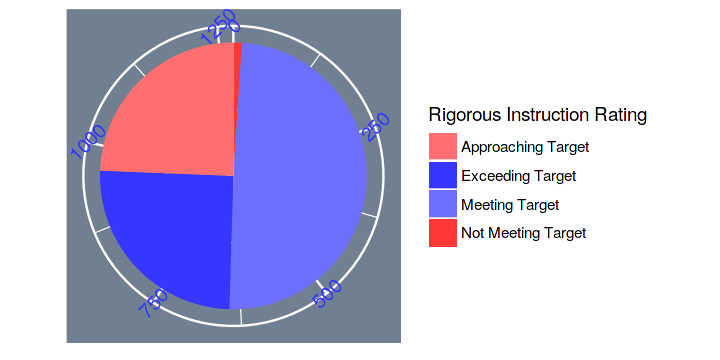

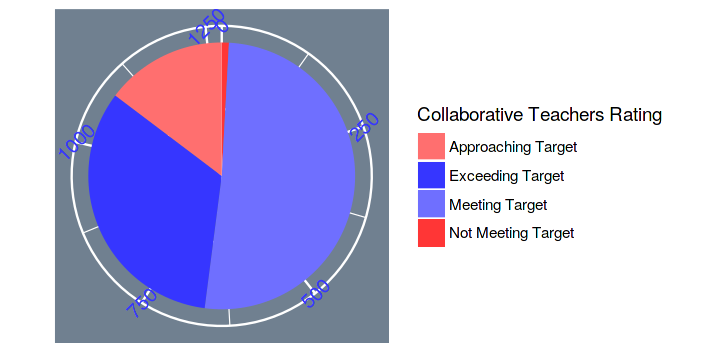

In [27]:
options(repr.plot.width=6,repr.plot.height=3)
display_html('<p style="color:#3636ff; font-family:Roboto; 
font-size:200%; text-shadow:5px 5px 5px #aaa;">
Frequency Diagrams of Rating Indicators</p>')
vc=c(cols[4],cols[1],cols[3],cols[2])
for (i in 1:2) {
    vtable<-data.frame(table(school_explorer[rating_list[i]]))[c(1,2,3,5),1:2]
    print(ggplot(vtable, aes(x=factor(1),y=Freq,fill=factor(Var1))) + 
              geom_bar(width=1,stat="identity")+ 
              coord_polar(theta="y")+
              scale_fill_manual(name=gsub("\\."," ",rating_list[i]),values=vc)+
              theme(axis.title=element_blank(),
                    axis.line=element_blank(),
                    axis.ticks.y=element_blank(),
                    axis.text.y=element_blank(),
                    axis.text.x=element_text(colour=cols[1],size=12,angle=45),
                    panel.background=element_rect(fill='slategray'))) }

#### Bar PLots

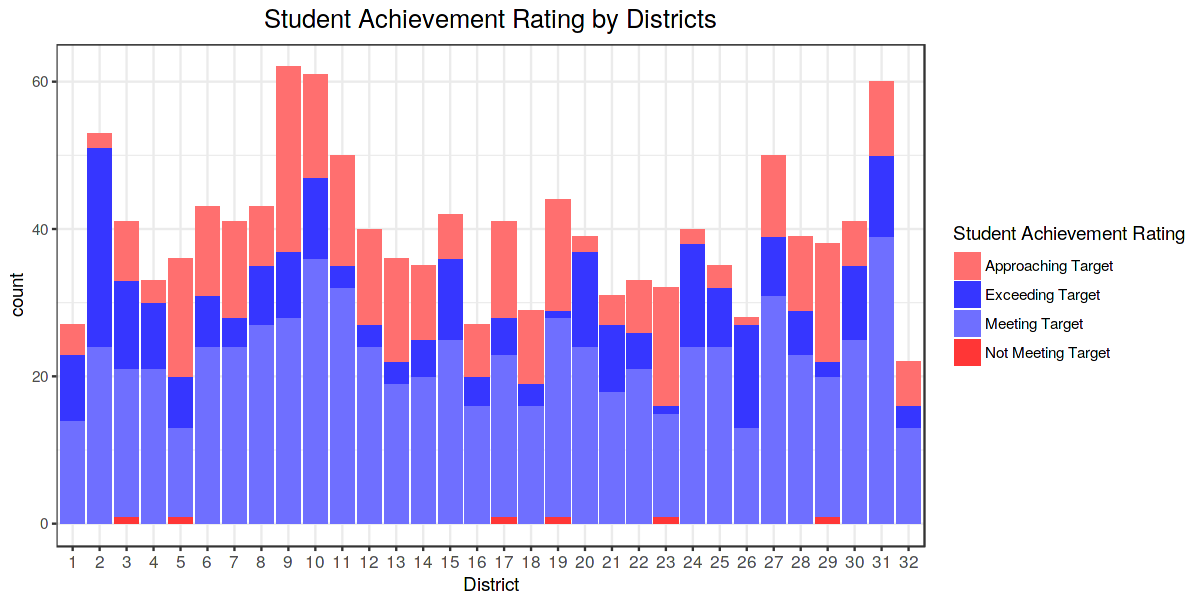

In [28]:
options(repr.plot.width=10,repr.plot.height=5)
ggplot(school_explorer,
       aes(x=factor(District),fill=Student.Achievement.Rating))+
    geom_bar()+theme_bw()+xlab("District")+
    ggtitle('Student Achievement Rating by Districts')+
    scale_fill_manual(name="Student Achievement Rating",values=vc)+
    theme(plot.title=element_text(size=15,hjust=.5),
          axis.text.x=element_text(size=10,angle=0))

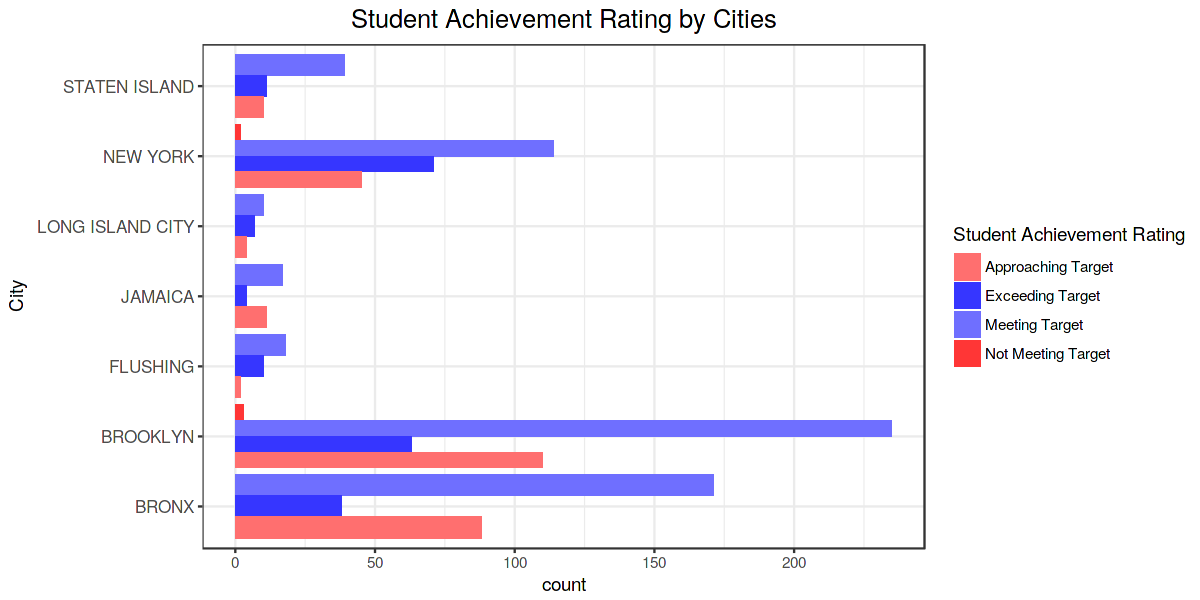

In [29]:
city_list=c('NEW YORK','BRONX','BROOKLYN',
            'STATEN ISLAND','JAMAICA',
            'FLUSHING','LONG ISLAND CITY')
ggplot(subset(school_explorer, school_explorer$City %in% city_list),
       aes(x=factor(City),fill=Student.Achievement.Rating))+
    geom_bar(position='dodge')+theme_bw()+ 
    coord_flip()+#facet_wrap(~Student.Achievement.Rating)+
    xlab("City")+ggtitle('Student Achievement Rating by Cities')+
    scale_fill_manual(name="Student Achievement Rating",values=vc)+
    theme(plot.title=element_text(size=15,hjust=.5),
          axis.text.y=element_text(size=10))

Low and High Grades by Districts

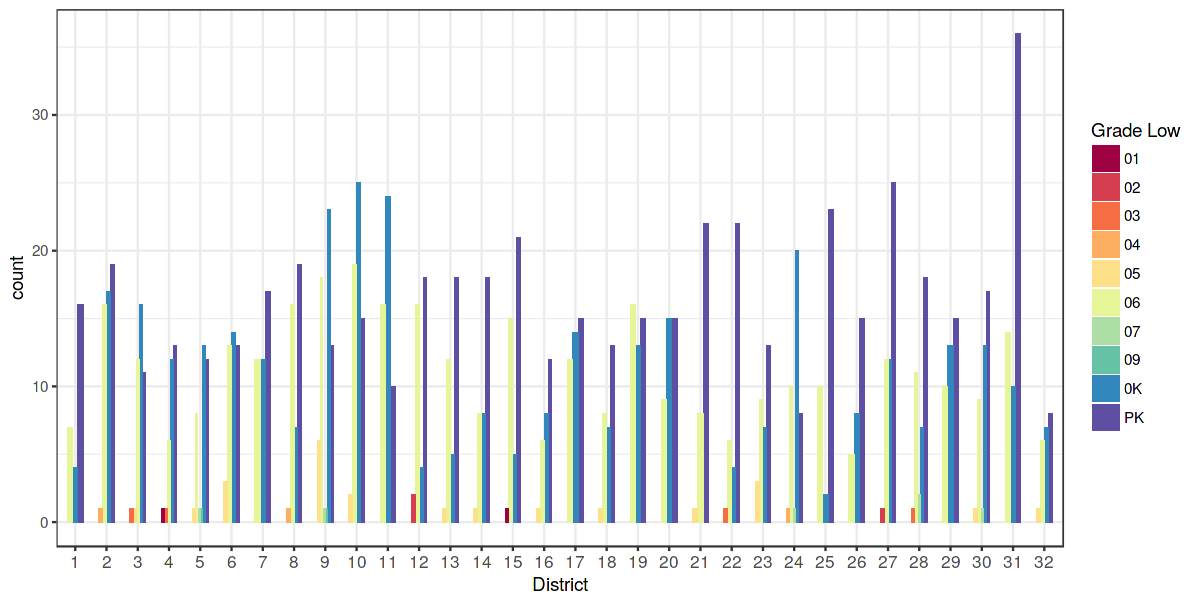

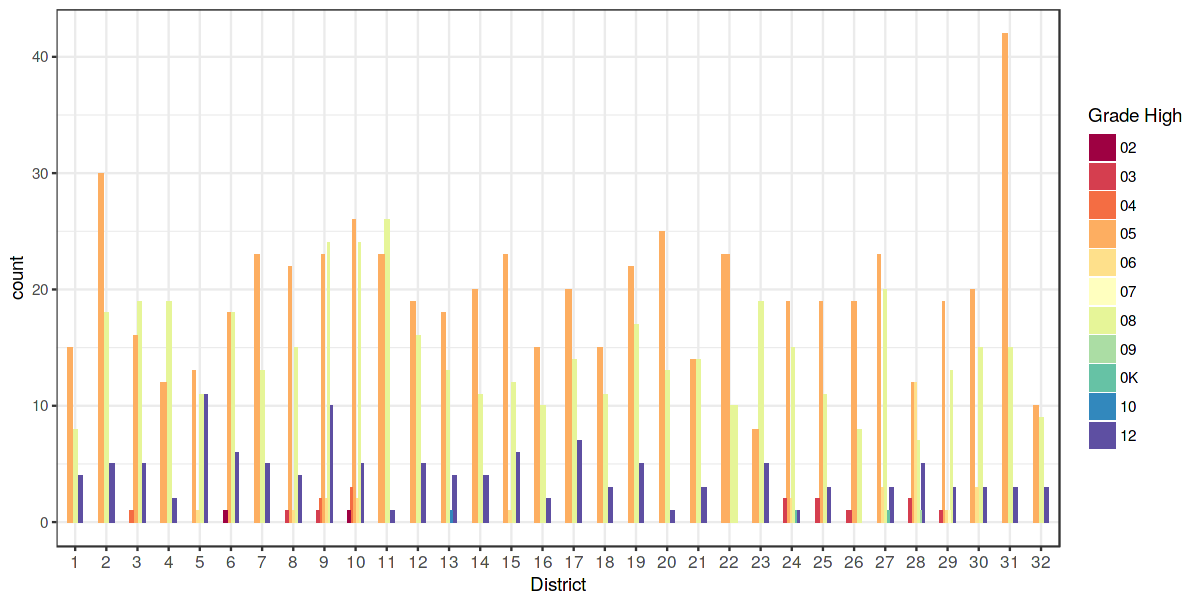

In [30]:
display_html('<p style="color:#3636ff; font-family:Roboto; 
font-size:200%; text-shadow:5px 5px 5px #aaa;">
Low and High Grades by Districts</p>')
plot_variable2<-function(v) {
    ggplot(school_explorer,
           aes(x=factor(District),
               fill=school_explorer[v][1:1272,]))+
    geom_bar(position='dodge',width=.5)+theme_bw()+
    xlab("District")+ 
    scale_fill_brewer(name=gsub("\\."," ",v),palette='Spectral')+
    theme(plot.title=element_text(size=15,hjust=.5),
          axis.text.x=element_text(size=10,angle=0)) }
plot_variable2('Grade.Low')
plot_variable2('Grade.High')

In [31]:
g4s_list<-c("All.Students.Tested","All.Students.4s",
            "American.Indian.or.Alaska.Native.4s",
            "Black.or.African.American.4s",
            "Hispanic.or.Latino.4s",
            "Asian.or.Pacific.Islander.4s",
            "White.4s","Multiracial.4s",
            "Limited.English.Proficient.4s",
            "Economically.Disadvantaged.4s")
grade_list<-c('Grade 3','Grade 4','Grade 5','Grade 6','Grade 7','Grade 8')
grades_ela<-data.frame(colSums(school_explorer[1:1272,39:48]),
                       colSums(school_explorer[1:1272,59:68]),
                       colSums(school_explorer[1:1272,79:88]),
                       colSums(school_explorer[1:1272,99:108]),
                       colSums(school_explorer[1:1272,119:128]),
                       colSums(school_explorer[1:1272,139:148]))
grades_ela<-data.frame(t(grades_ela))
grades_math<-data.frame(colSums(school_explorer[1:1272,49:58]),
                        colSums(school_explorer[1:1272,69:78]),
                        colSums(school_explorer[1:1272,89:98]),
                        colSums(school_explorer[1:1272,109:118]),
                        colSums(school_explorer[1:1272,129:138]),
                        colSums(school_explorer[1:1272,149:158]))
grades_math<-data.frame(t(grades_math))
colnames(grades_ela)<-g4s_list
rownames(grades_ela)<-grade_list
colnames(grades_math)<-g4s_list
rownames(grades_math)<-grade_list
t(grades_ela); t(grades_math)

,Grade 3,Grade 4,Grade 5,Grade 6,Grade 7,Grade 8
All.Students.Tested,77044,73786,71660,69383,68254,66351
All.Students.4s,6300,12598,8320,10626,8320,9314
American.Indian.or.Alaska.Native.4s,12,30,22,29,24,17
Black.or.African.American.4s,908,1716,954,1426,866,1166
Hispanic.or.Latino.4s,1054,2582,1536,1954,1542,1934
Asian.or.Pacific.Islander.4s,1714,3212,2292,3422,2543,2869
White.4s,1743,3231,2390,2762,2524,2457
Multiracial.4s,50,65,34,93,33,20
Limited.English.Proficient.4s,31,60,13,24,3,2
Economically.Disadvantaged.4s,2522,5812,3619,5552,4033,4979


,Grade 3,Grade 4,Grade 5,Grade 6,Grade 7,Grade 8
All.Students.Tested,78421,75053,72839,70540,69053,55766
All.Students.4s,17653,16781,11909,15479,10888,6248
American.Indian.or.Alaska.Native.4s,35,47,36,30,24,4
Black.or.African.American.4s,2869,2240,1120,1856,951,776
Hispanic.or.Latino.4s,3581,3457,2115,2907,1730,1205
Asian.or.Pacific.Islander.4s,5121,5024,4133,5456,4282,2524
White.4s,3829,3704,2992,3804,2947,1235
Multiracial.4s,84,80,37,96,43,3
Limited.English.Proficient.4s,675,492,223,355,158,203
Economically.Disadvantaged.4s,8494,8287,5675,8495,5790,3806


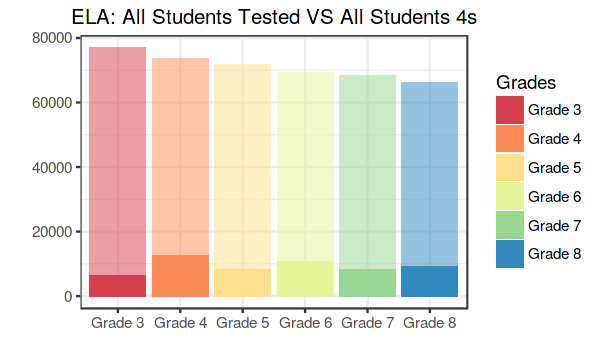

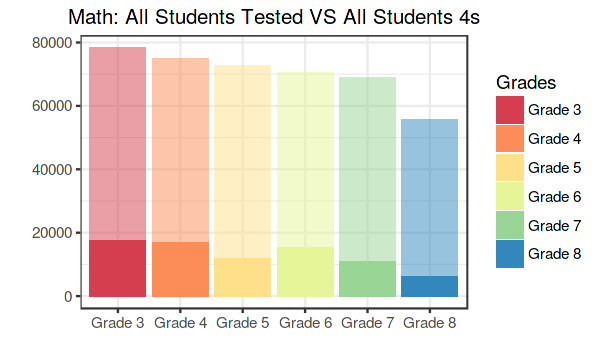

In [32]:
options(repr.plot.width=5,repr.plot.height=3)
add<-function(angle) {
    list(scale_fill_brewer(name="Grades",palette='Spectral'),
         xlab(''), ylab(''),theme_bw(),
         theme(plot.title=element_text(size=12,hjust=.5),
               axis.text.x=element_text(angle=angle)))}
ggplot(data=grades_ela, 
       aes(x=rownames(grades_ela),fill=rownames(grades_ela)))+
    geom_bar(aes(y=All.Students.Tested),stat="identity",alpha=.5)+
    geom_bar(aes(y=All.Students.4s),stat="identity")+
    ggtitle('ELA: All Students Tested VS All Students 4s')+add(0)
ggplot(data=grades_math, 
       aes(x=rownames(grades_math),fill=rownames(grades_math)))+
    geom_bar(aes(y=All.Students.Tested),stat="identity",alpha=.5)+
    geom_bar(aes(y=All.Students.4s),stat="identity")+
    ggtitle('Math: All Students Tested VS All Students 4s')+add(0)

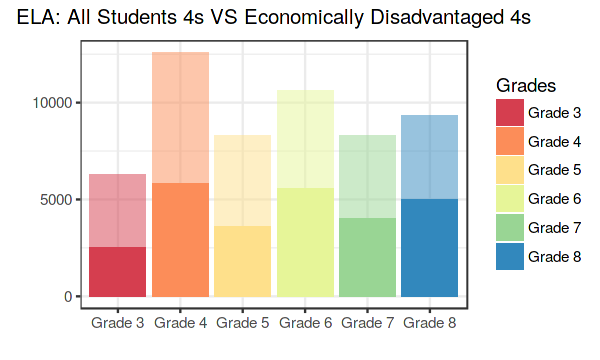

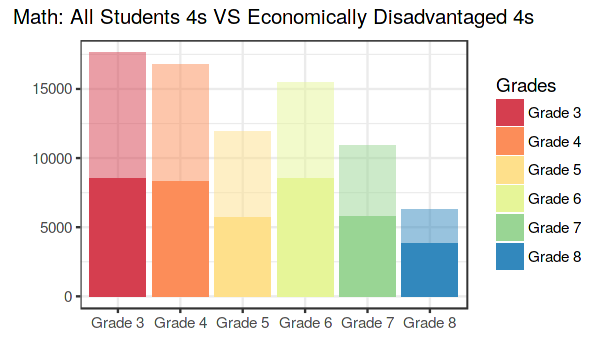

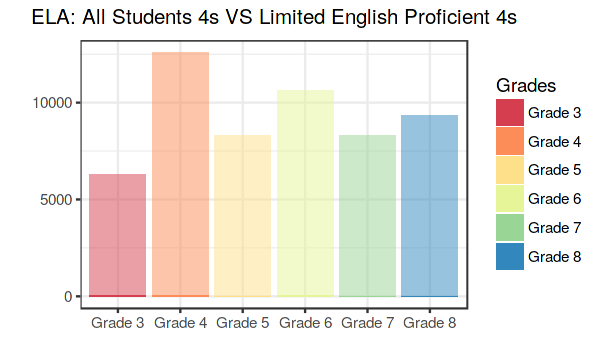

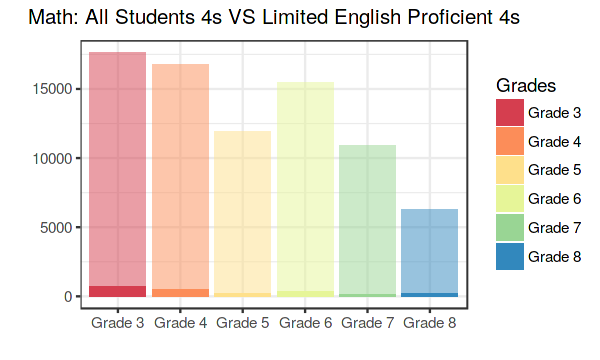

In [33]:
ggplot(data=grades_ela, 
       aes(x=rownames(grades_ela),fill=rownames(grades_ela)))+add(0) +
    geom_bar(aes(y=All.Students.4s),stat="identity",alpha=.5)+
    geom_bar(aes(y=Economically.Disadvantaged.4s),stat="identity")+
    ggtitle('ELA: All Students 4s VS Economically Disadvantaged 4s')
ggplot(data=grades_math, 
       aes(x=rownames(grades_math),fill=rownames(grades_math)))+add(0)+
    geom_bar(aes(y=All.Students.4s),stat="identity",alpha=.5)+
    geom_bar(aes(y=Economically.Disadvantaged.4s),stat="identity")+
    ggtitle('Math: All Students 4s VS Economically Disadvantaged 4s')
ggplot(data=grades_ela, 
       aes(x=rownames(grades_ela),fill=rownames(grades_ela)))+add(0) +
    geom_bar(aes(y=All.Students.4s),stat="identity",alpha=.5) +
    geom_bar(aes(y=Limited.English.Proficient.4s),stat="identity") +
    ggtitle('ELA: All Students 4s VS Limited English Proficient 4s')
ggplot(data=grades_math, 
       aes(x=rownames(grades_math),fill=rownames(grades_math)))+add(0) +
    geom_bar(aes(y=All.Students.4s),stat="identity",alpha=.5)+
    geom_bar(aes(y=Limited.English.Proficient.4s),stat="identity")+
    ggtitle('Math: All Students 4s VS Limited English Proficient 4s')

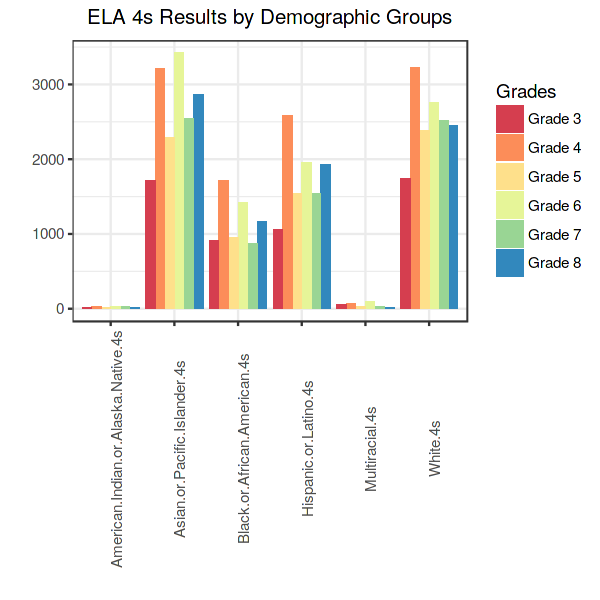

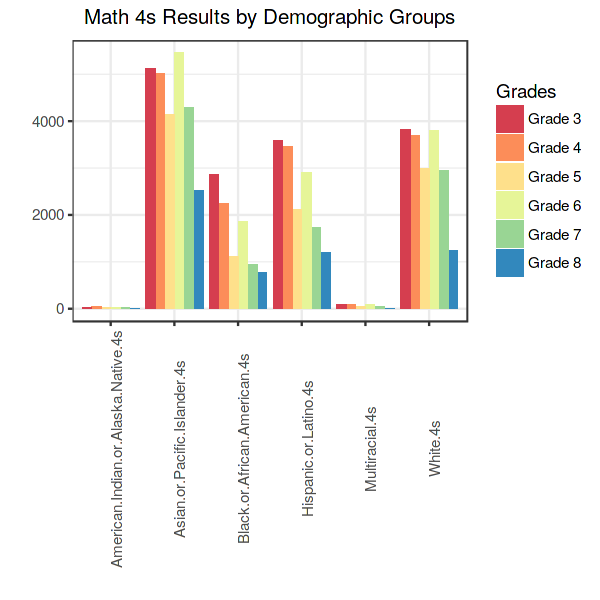

In [34]:
options(repr.plot.width=5,repr.plot.height=5)
Grades<-c(rep(rownames(grades_ela),6))
Groups<-c(rep(colnames(grades_ela[,c(3:8)]),each=6))
Value<-as.vector(as.matrix(grades_ela[,c(3:8)]))
data<-data.frame(Grades,Groups,Value)
ggplot(data,aes(x=Groups,y=Value,fill=Grades))+
    geom_bar(position="dodge",stat="identity")+ 
    ggtitle("ELA 4s Results by Demographic Groups")+add(90)
Grades<-c(rep(rownames(grades_math),6))
Groups<-c(rep(colnames(grades_math[,c(3:8)]),each=6))
Value<-as.vector(as.matrix(grades_math[,c(3:8)]))
data<-data.frame(Grades,Groups,Value)
ggplot(data,aes(x=Groups,y=Value,fill=Grades))+
    geom_bar(position="dodge",stat="identity")+ 
    ggtitle("Math 4s Results by Demographic Groups")+add(90)

Users could realize immediately that

- the indicator `Economically Disadvantaged` is not a reason for worse exam scores, and
- the indicator `Limited English Proficient` affects them really strongly.

It's not a secret that many test texts could have confused meaning so it's important to understand them correctly.

The same explanation could be applied for understanding this problem in different demographic groups:

- worse English speakers have worse results.

So for the successful exam process, it needs to move in two directions:

- make exam materials more understandable by visualization,
- improve English knowledge among students as much as it is possible.

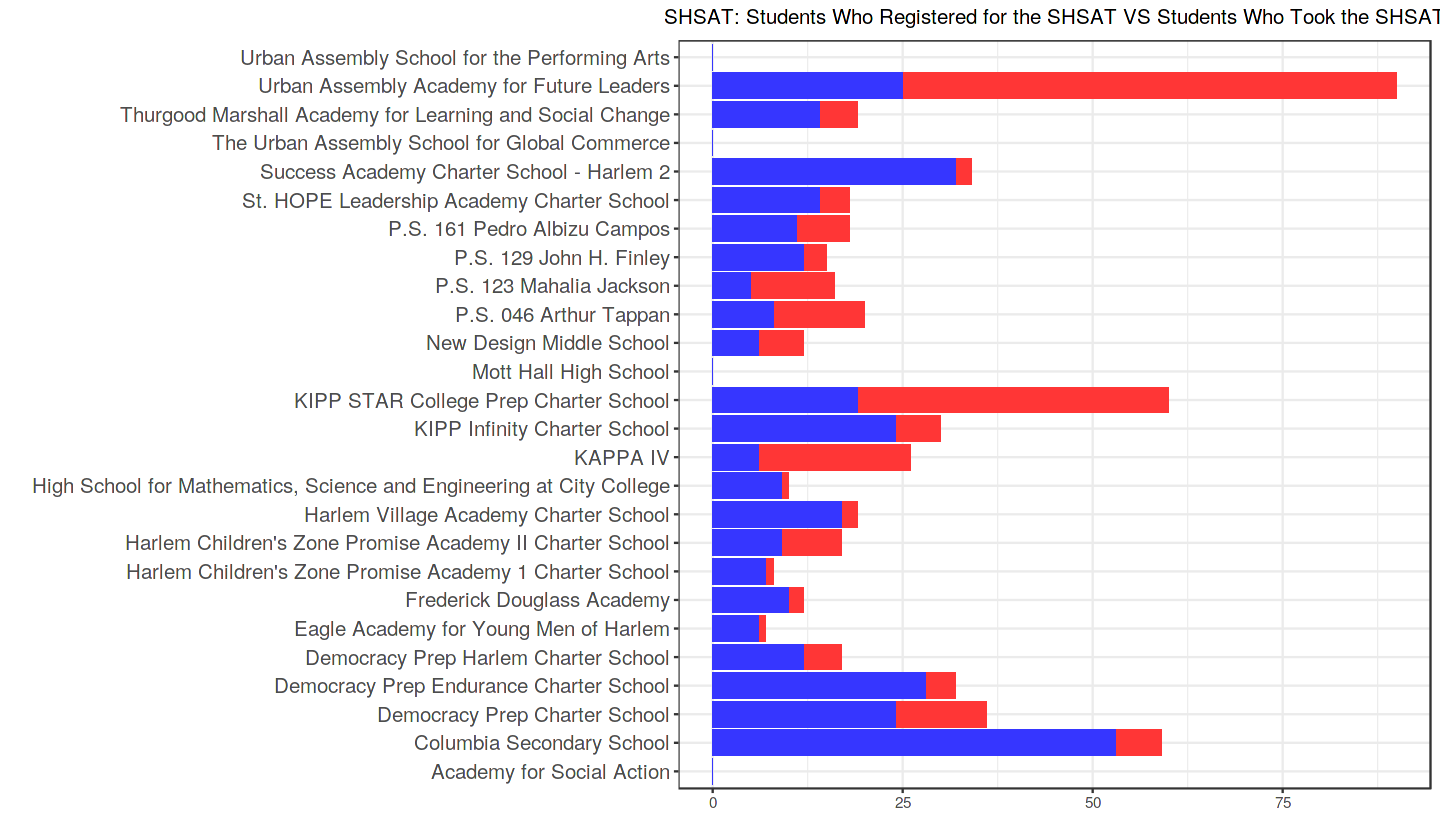

In [35]:
options(repr.plot.width=12,repr.plot.height=7)
d5_shsat_2016<-d5_shsat[which(d5_shsat['Year.of.SHST']==2016),]
ggplot(data=d5_shsat_2016, 
       aes(x=School.name))+theme_bw()+coord_flip()+
    geom_bar(aes(y=d5_shsat_2016$Number.of.students.who.registered.for.the.SHSAT),
             stat="identity",fill=cols[2])+
    geom_bar(aes(y=d5_shsat_2016$Number.of.students.who.took.the.SHSAT),
             stat="identity",fill=cols[1])+
    xlab("")+ylab("")+ 
    theme(plot.title=element_text(size=12,hjust=.5),
          axis.text.y=element_text(size=12))+
    ggtitle('SHSAT: Students Who Registered for the SHSAT VS Students Who Took the SHSAT')

<h1 class='font-effect-3d' style='color:#37c9e1; font-family:Orbitron;'> &#x1F310; &nbsp; School Types </h1>

Community & Non-Community Schools

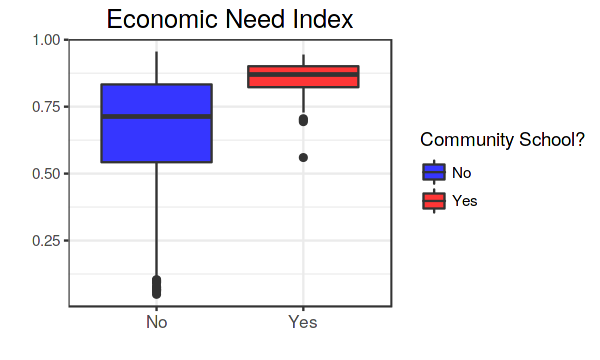

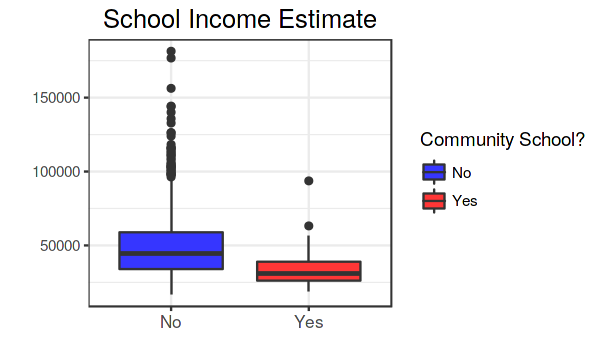

In [36]:
display_html('<p style="color:#3636ff; font-family:Roboto; 
font-size:200%; text-shadow:5px 5px 5px #aaa;">
Community & Non-Community Schools</p>')
options(repr.plot.width=5,repr.plot.height=3)
plot_variable3<-function(v) {
    ggplot(school_explorer,
           aes(x=Community.School.,fill=Community.School.))+
    geom_boxplot(aes(y=c(school_explorer[,v])))+
    ggtitle(gsub("\\."," ",v))+
    theme_bw()+xlab("")+ylab("")+
    scale_fill_manual(name="Community School?",values=cols[1:2])+
    theme(plot.title=element_text(size=15,hjust=.5),
          axis.text.x=element_text(size=10,angle=0)) }
plot_variable3('Economic.Need.Index')
plot_variable3('School.Income.Estimate')

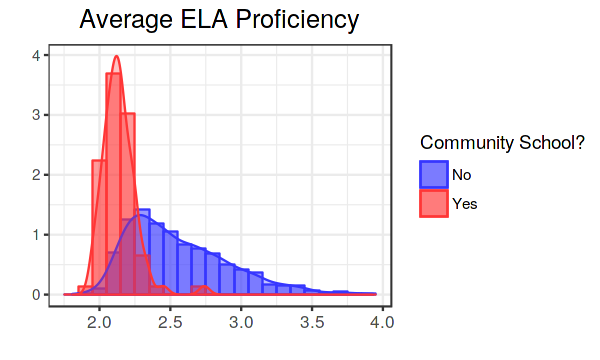

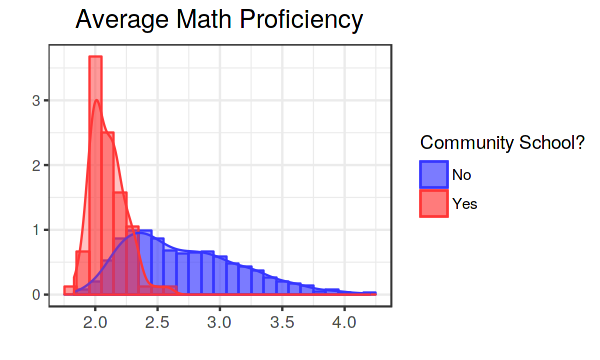

In [37]:
plot_variable4<-function(v) {
    ggplot(school_explorer, aes(x=c(school_explorer[,v]),
                                fill=Community.School.,
                                color=Community.School.))+ 
    geom_histogram(aes(y=..density..),
                   binwidth=.1,alpha=.5,
                   position="identity")+
    geom_density(alpha=.3)+theme_bw()+
    ggtitle(gsub("\\."," ",v))+xlab("")+ylab("")+
    scale_color_manual(name="Community School?",values=cols[1:2])+
    scale_fill_manual(name="Community School?",values=cols[1:2])+
    theme(plot.title=element_text(size=15,hjust=.5),
          axis.text.x=element_text(size=10,angle=0))}
plot_variable4('Average.ELA.Proficiency')
plot_variable4('Average.Math.Proficiency')

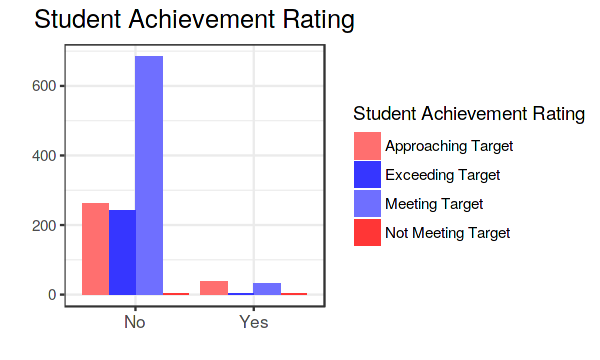

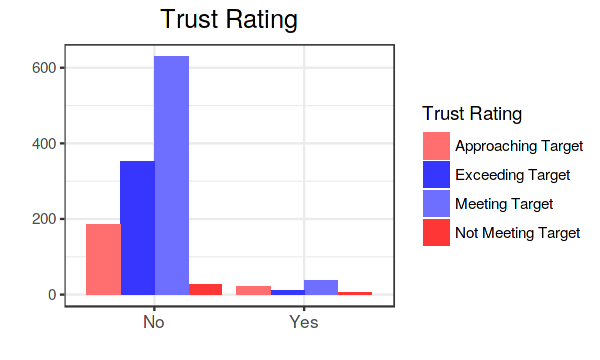

In [38]:
plot_variable5<-function(v) {
    ggplot(school_explorer,
           aes(x=Community.School.,fill=school_explorer[,v]))+
    geom_bar(stat="count",position="dodge")+
    ggtitle(gsub("\\."," ",v))+
    theme_bw()+xlab("")+ylab("")+ 
    scale_fill_manual(name=gsub("\\."," ",v),values=vc)+
    theme(plot.title=element_text(size=15,hjust=.5),
          axis.text.x=element_text(size=10,angle=0))}
plot_variable5('Student.Achievement.Rating')
plot_variable5('Trust.Rating')

In [39]:
com_school_explorer<-aggregate(school_explorer[percent_list], 
                               list(school_explorer$Community.School.),mean)
colnames(com_school_explorer)<-c('Community.School',percent_list)
t(com_school_explorer)

Community.School,No,Yes
Percent.ELL,12.16221,17.55263
Percent.Asian,12.223244,2.592105
Percent.Black,31.40385,41.31579
Percent.Hispanic,40.42893,52.55263
Percent.Black...Hispanic,71.82860,93.84211
Percent.White,13.846154,2.421053
Student.Attendance.Rate,92.87667,90.31579
Percent.of.Students.Chronically.Absent,20.59239,35.56579
Rigorous.Instruction..,89.51380,86.55263
Collaborative.Teachers..,88.50836,84.84211


Community schools need a lot of attention in all spheres, in the education results - at first.
<h1 class='font-effect-3d' style='color:#37c9e1; font-family:Orbitron;'> &#x1F310; &nbsp; Let's Go Ahead </h1>
Of course, this notebook is just only having a look at the data.

It' s time to move to the next step.
#### &#x1F4D8; &nbsp; [PASSNYC. Numeric and Categorical Variables](https://www.kaggle.com/olgabelitskaya/passnyc-numeric-and-categorical-variables)